For a more detailed guide refer to `tensorflow` or `pytorch` example or to the documentation on https://clipper.ai.
This example uses `matplotlib`, in case you cannot use it, please comment out respective 2 cells - 7 & 8

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from joblib import dump, load
import numpy as np

In [3]:
# Load a dataset
diabetes = datasets.load_diabetes() # load data

In [4]:
diabetes.data.shape # feature matrix shape

(442, 10)

In [5]:
# Seperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.33222203269065176

In [6]:
model.predict(X_test) # Predict unkown data

array([ 238.47145247,  248.93170646,  164.05404165,  120.30794355,
        187.42422054,  259.04865002,  113.55556372,  188.07597044,
        149.49663441,  236.01099949,  172.24629506,  178.88073764,
        109.15751983,   92.13508975,  243.33042043,   87.356971  ,
        155.72606406,   66.99073989,  100.42610442,  218.09422877,
        196.66287912,  161.29832968,  161.70779605,  156.52520454,
        197.88796516,  167.57984206,  120.74478913,   84.83879727,
        192.03728687,  160.60687024,  175.17178362,   84.22833237,
        145.7995542 ,  145.97333493,  140.96488953,  197.00421108,
        165.94322494,  190.65906468,  128.22520508,  206.41941223,
         84.35851196,  164.0256504 ,  144.1056776 ,  184.68355549,
        177.80238966,   74.32855231,  143.3660286 ,  138.67726085,
        120.81146113,  234.34252077,  161.94390244,   74.5455476 ,
        154.71905074,  156.78884927,  237.42227096,  174.23053048,
        190.88212635,  118.98373473,  132.20418974,  168.52674

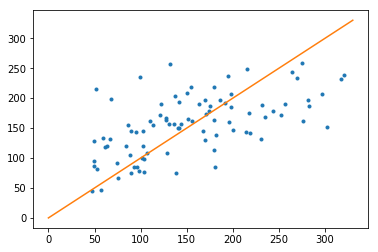

In [7]:
# Using matplotlib, comment it out if you don't want to see the plots
import matplotlib.pylab as plt
%matplotlib inline
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

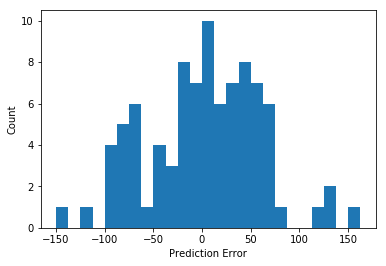

In [8]:
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [9]:
from joblib import dump, load
dump(model, 'model_scikit.joblib')
print("Model saved")
del(model)
# Let's check if the model variable is really gone
try: 
    model
except NameError:
    print("Model variable removal successful")

Model saved
Model variable removal successful


In [10]:
# Load model
model = load('model_scikit.joblib')

In [11]:
# Data point for prediction function check
data = [0.01991321,  0.05068012,  0.10480869,  0.07007254, -0.03596778, 
        -0.0266789 , -0.02499266, -0.00259226,  0.00371174,  0.04034337]

In [12]:
model.predict([data])

array([ 238.47145272])

In [13]:
from clipper_admin import ClipperConnection, DockerContainerManager
from clipper_admin.deployers import python as python_deployer
clipper_conn = ClipperConnection(DockerContainerManager())

In [14]:
clipper_conn.start_clipper()

19-05-31:09:46:37 INFO     [docker_container_manager.py:154] [default-cluster] Starting managed Redis instance in Docker
19-05-31:09:46:39 INFO     [docker_container_manager.py:232] [default-cluster] Metric Configuration Saved at /tmp/tmpon_lhuc0.yml
19-05-31:09:46:40 INFO     [clipper_admin.py:143] [default-cluster] Clipper is running


In [16]:
clipper_conn.connect()
clipper_conn.get_all_apps()

19-05-31:09:47:31 INFO     [clipper_admin.py:156] [default-cluster] Successfully connected to Clipper cluster at localhost:1337


[]

In [17]:
clipper_conn.get_all_models()

[]

In [18]:
clipper_conn.register_application(name="scikit-app", input_type="doubles", default_output="-1.0", slo_micros=100000)

19-05-31:09:47:35 INFO     [clipper_admin.py:220] [default-cluster] Application scikit-app was successfully registered


In [19]:
python_deployer.deploy_python_closure(clipper_conn, name="scikit-mod", 
                                      version=1, 
                                      input_type="doubles", 
                                      func=model.predict,
                                      pkgs_to_install=['scikit-learn'])

19-05-31:09:47:36 INFO     [deployer_utils.py:41] Saving function to /tmp/tmp1tcxbie1clipper
19-05-31:09:47:36 INFO     [deployer_utils.py:51] Serialized and supplied predict function
19-05-31:09:47:36 INFO     [python.py:192] Python closure saved
19-05-31:09:47:36 INFO     [clipper_admin.py:513] [default-cluster] Building model Docker image with model data from /tmp/tmp1tcxbie1clipper
19-05-31:09:47:37 INFO     [clipper_admin.py:518] [default-cluster] Step 1/2 : FROM dockerfile-scikit
19-05-31:09:47:37 INFO     [clipper_admin.py:518] [default-cluster]  ---> 54ae579f40ef
19-05-31:09:47:37 INFO     [clipper_admin.py:518] [default-cluster] Step 2/2 : COPY /tmp/tmp1tcxbie1clipper /model/
19-05-31:09:47:37 INFO     [clipper_admin.py:518] [default-cluster]  ---> 411276003e84
19-05-31:09:47:37 INFO     [clipper_admin.py:518] [default-cluster] Successfully built 411276003e84
19-05-31:09:47:37 INFO     [clipper_admin.py:518] [default-cluster] Successfully tagged default-cluster-scikit-mod:1
19

In [20]:
clipper_conn.link_model_to_app(
    app_name="scikit-app",
    model_name="scikit-mod")

19-05-31:09:47:43 INFO     [clipper_admin.py:282] [default-cluster] Model scikit-mod is now linked to application scikit-app


In [21]:
clipper_conn.get_all_apps()

['scikit-app']

In [22]:
import requests, json, numpy as np
headers = {"Content-type": "application/json"}
requests.post("http://localhost:1337/scikit-app/predict", headers=headers, 
              data=json.dumps({"input": data})).json()
# The result is as in the local predict function call

{'query_id': 0, 'output': 238.47145271668833, 'default': False}

In [23]:
clipper_conn.unlink_model_from_app(model_name="scikit-mod", app_name="scikit-app")

19-05-31:09:48:19 INFO     [clipper_admin.py:323] Model scikit-mod is now removed to application scikit-app


In [24]:
clipper_conn.stop_models('scikit-mod')

19-05-31:09:48:36 INFO     [clipper_admin.py:1238] [default-cluster] Stopped all containers for these models and versions:
{'scikit-mod': ['1']}


In [25]:
clipper_conn.delete_application('scikit-app')

19-05-31:09:48:36 INFO     [clipper_admin.py:239] [default-cluster] Application scikit-app was successfully deleted


In [26]:
clipper_conn.stop_all()

19-05-31:09:49:07 INFO     [clipper_admin.py:1324] [default-cluster] Stopped all Clipper cluster and all model containers
